# Deep Learning for Image Classification Assessment


Welcome to your assessment! Follow the instructions in bold below to complete the assessment.

If you get stuck, check out the solutions video and notebook. (Make sure to run the solutions notebook before posting a question to the QA forum please, thanks!)

------------

## The Challenge

**Your task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## The Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [36]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## Visualizing the Data

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [37]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


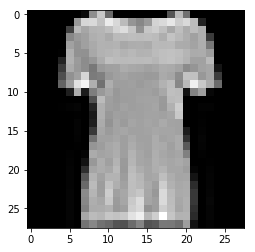

In [4]:
plt.imshow(x_train[10],cmap="gray")

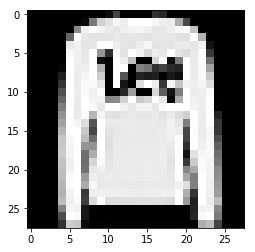

In [5]:
plt.imshow(x_test[1],cmap='gray')

## Preprocessing the Data

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [38]:
x_train = x_train/255
x_test = x_test/255

In [7]:
x_train.max()

1.0

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [9]:
x_train.shape

(60000, 28, 28)

In [39]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [40]:
x_train.shape

(60000, 28, 28, 1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [41]:
from keras.utils.np_utils import to_categorical

In [42]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [43]:
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

In [44]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Building the Model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=32 and kernel_size=(4,4)
* Pooling Layer where pool_size = (2,2)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [26]:
from keras.models import Sequential
from keras.layers import Dense,MaxPooling2D,Conv2D,Flatten

In [32]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])


In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               589952    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


### Training the Model
**TASK 6: Train/Fit the model to the x_train set. Amount of epochs is up to you.**

In [45]:
model.fit(x_train,y_cat_train,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 36s 603us/step - loss: 0.3940 - acc: 0.8592
Epoch 2/10
60000/60000 [==============================] - 35s 591us/step - loss: 0.2732 - acc: 0.9019
Epoch 3/10
60000/60000 [==============================] - 36s 593us/step - loss: 0.2361 - acc: 0.9149
Epoch 4/10
60000/60000 [==============================] - 36s 593us/step - loss: 0.2122 - acc: 0.9238
Epoch 5/10
60000/60000 [==============================] - 36s 603us/step - loss: 0.1936 - acc: 0.9306
Epoch 6/10
60000/60000 [==============================] - 36s 593us/step - loss: 0.1783 - acc: 0.9371
Epoch 7/10
60000/60000 [==============================] - 36s 601us/step - loss: 0.1666 - acc: 0.9417
Epoch 8/10
60000/60000 [==============================] - 36s 600us/step - loss: 0.1562 - acc: 0.9452
Epoch 9/10
60000/60000 [==============================] - 37s 621us/step - loss: 0.1475 - acc: 0.9486
Epoch 10/10
60000/60000 [==============================] - 37s 613us/step - loss: 

### Evaluating the Model

**TASK 7: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [47]:
model.metrics_names

['loss', 'acc']

In [48]:
from sklearn.metrics import classification_report

In [51]:
predictions = model.predict_classes(x_test)

In [55]:
model.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 2s 238us/step


[0.32907067705094817, 0.904]

In [52]:
predictions

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [53]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.89      0.80      0.85      1000
           3       0.89      0.93      0.91      1000
           4       0.83      0.87      0.85      1000
           5       0.98      0.97      0.98      1000
           6       0.71      0.77      0.74      1000
           7       0.96      0.95      0.96      1000
           8       0.99      0.97      0.98      1000
           9       0.94      0.97      0.96      1000

   micro avg       0.90      0.90      0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



# Great Job!